<br>
<br>

# `1. Root finding Method:`

<br>
<br>

<br>

# 4. Newton Rapson:

<br>

root is: 1.4142135623730951


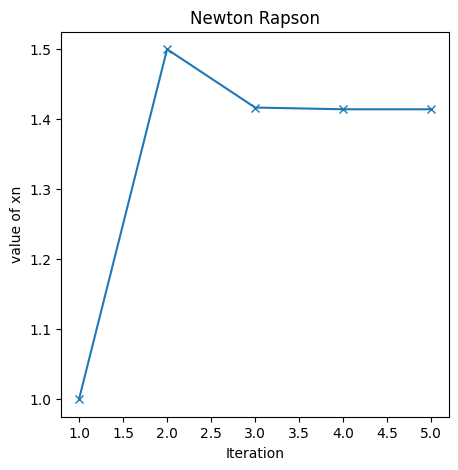

In [2]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


df = pd.DataFrame(columns=["xn","f(xn)","f(f`(xn))","X_N - (f(xn/f`(xn)))"])



def fn(x):
    return x**2 - 2 

def dnf(x):
    return 2*x

i = 0
def newton_rapson(x0,i=1,tol=1e-6,max_iter=100):
    fx = fn(x0)
    dfx = dnf(x0)
    x1 = x0 - (fx/dfx)
    val = {"xn":x0,"f(xn)":fx,"f(f`(xn))":dfx,"X_N - (f(xn/f`(xn)))":x1}
    df.loc[i] = val
    
    #stoping condition:
    if abs(x1-x0) <tol or i>max_iter:
        print(f"root is: {x1}")
        return x1
    else:
        newton_rapson(x1,i+1)
        

x0 = 1
root = newton_rapson(x0)  

plt.figure(figsize=(5,5))
plt.plot(df.index,df["xn"],marker='x')   
plt.title("Newton Rapson")
plt.xlabel("Iteration") 
plt.ylabel("value of xn")
plt.show()


In [3]:
df

,xn,f(xn),f(f`(xn)),X_N - (f(xn/f`(xn)))
1,1.000000,-1.000000e+00,2.000000,1.500000
2,1.500000,2.500000e-01,3.000000,1.416667
3,1.416667,6.944444e-03,2.833333,1.414216
4,1.414216,6.007305e-06,2.828431,1.414214
5,1.414214,4.510614e-12,2.828427,1.414214


<br>
<br>

# `2. Numerial Intregration:`

<br>
<br>



### 1. Trapizoidal:

In [14]:


def fn(x):
    return x**2 

df = pd.DataFrame(columns=["i","x_i","f(x_i)"])

def trapizoidal_rule(a,b,fn,n):
    del_x = (b-a)/n
    for i in range(n+1):
        x_i = a + i * del_x 
        fxi = fn(x_i)
        val = {"i":i,"x_i":x_i,"f(x_i)":fxi}
        df.loc[i] = val
    
    fx_values = df["f(x_i)"]
    result = (del_x/2) * (fx_values.iloc[0] + 2*fx_values.iloc[1:-1].sum() + fx_values.iloc[-1])
    
    return result.item()


a = 0
b = 2
n = 10
ans = trapizoidal_rule(a,b,fn,n)
ans



2.6800000000000006

In [15]:
df

,i,x_i,f(x_i)
0,0,0.0,0.00
1,1,0.2,0.04
2,2,0.4,0.16
3,3,0.6,0.36
4,4,0.8,0.64
5,5,1.0,1.00
6,6,1.2,1.44
7,7,1.4,1.96
8,8,1.6,2.56
9,9,1.8,3.24


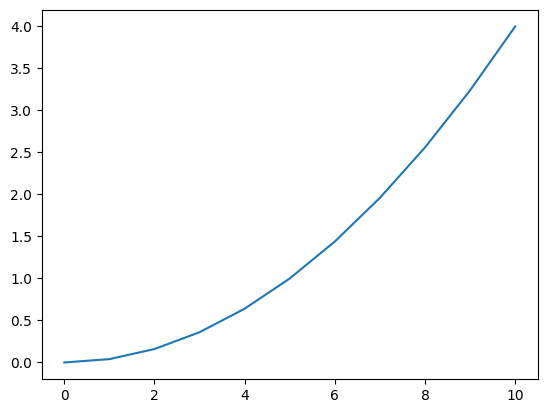

In [17]:
plt.plot(df['i'],df["f(x_i)"])